In [3]:
# Python works inline, quick syntax recap
##
print(5)

##
a = [1,2,3]
[x + 1 for x in a]
print(a)

##
b = f"{2+3} number"
print(s)

##
c = { 'x': 2, y: '5' }

5
[1, 2, 3]
5 number


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.0, 0.010000000000000002, 0.04000000000000001, 0.09000000000000002, 0.16000000000000003, 0.25, 0.3600000000000001, 0.4900000000000001, 0.6400000000000001, 0.81, 1.0]


<AxesSubplot:>

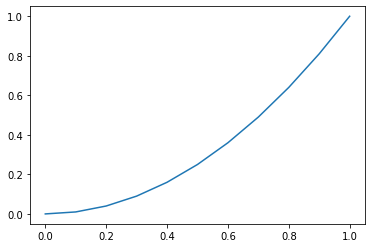

In [37]:
# Example of plotting with seaborn
import numpy as np
import seaborn as sns

x = np.arange(0.0, 1.0, step=0.1)
print(x)
y = [pow(x, 2) for x in x]
print(y)

sns.lineplot(x=x, y=y)

In [39]:
# Create data frame
import pandas as pd

data_dict = { 'A': x, 'B': y }
df = pd.DataFrame(data_dict)

df

,A,B
0,0.0,0.00
1,0.1,0.01
2,0.2,0.04
3,0.3,0.09
4,0.4,0.16
5,0.5,0.25
6,0.6,0.36
7,0.7,0.49
8,0.8,0.64
9,0.9,0.81


In [40]:
# Playing with the data frames

df['A']
df[['A']]
df[['A', 'B']]

df[df['A'] == 0.0]

## rows first, then columns
df.loc[:, 'A']
df.iloc[:, 0]

,A,B
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


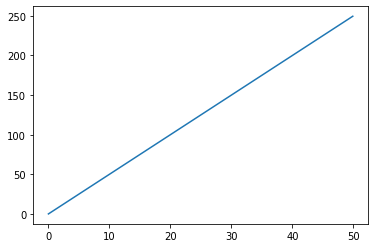

In [122]:
# Simple linear model
linear_function = lambda x: x * 5

x = np.arange(0.0, 50.0, step=0.1)
y = np.array([linear_function(x) for x in x])

print(x[:10])
print(y[:10])

# machine learning models works with an 2d array structure to hold data columns, and rows.
# each entry in an array is a row, holding information for all columns
# thats why for one property data, we need it too look like this:
# [
#   [0.0]
#   [0.1]
#   [0.2]
# ]
X = x.reshape(-1, 1)

sns.lineplot(lx, ly)

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X, y)

lx_test = np.arange(-251.0, 251.0, step=0.5)
ly_test = linear_model.predict(lx_test.reshape(-1, 1))

#sns.lineplot(lx_test, ly_test)

(117927, 10)

mark               object
model              object
generation_name    object
year                int64
mileage             int64
vol_engine          int64
fuel               object
city               object
province           object
price               int64
dtype: object

audi          12031
opel          11914
bmw           11070
volkswagen    10848
ford           9664
Name: mark, dtype: int64

count    117927.00
mean      70299.88
std       84824.58
min         500.00
25%       21000.00
50%       41900.00
75%       83600.00
max     2399900.00
Name: price, dtype: float64



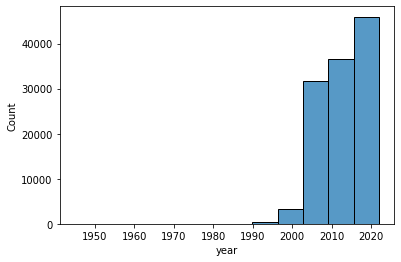

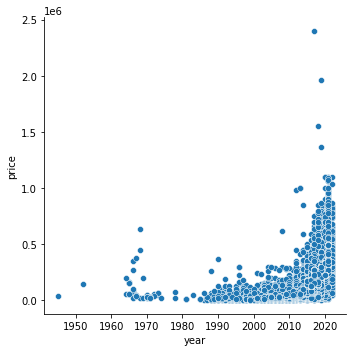

In [81]:
# Load the data
cars_df = pd.read_csv('./data/car_prices_poland.csv', index_col=0)

pd.options.display.float_format = '{:.2f}'.format

print(cars_df.shape)
print()
print(cars_df.dtypes)
print()
print(cars_df['mark'].value_counts().head(5))
print()
print(cars_df['price'].describe())
print()

sns.histplot(data=cars_df, x="year", bins=12)
sns.relplot(data=cars_df, x="year", y="price")